Visit original tutorial page: https://morvanzhou.github.io/tutorials/

Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:

- torch: 0.4

- matplotlib

In [23]:
import torch
# import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(1)    # reproducible


In [282]:
# data

x = torch.unsqueeze(torch.linspace(-1, 1, 200), dim=1) # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size()) # noise y data (tensor), shape = (100, 1)

# the code below is deprecated in Pyorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 20),
        torch.nn.ReLU(),
        torch.nn.Linear(20, 30),
        torch.nn.ReLU(),
#         torch.nn.Linear(20, 20),
#         torch.nn.ReLU(),
#         torch.nn.Dropout(p=0.3, inplace=False),
        torch.nn.Linear(30, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.01)
    loss_func = torch.nn.MSELoss()
    
    for t in range(500):
        if t%50 == 0:
            print(t)
        prediction = net1(x)
        loss = loss_func(prediction, y)
        loss.backward()
        optimizer.step() # update the gradients 
        
    # plot result
    fig = plt.figure(1, figsize=(10,3))
    ax = fig.add_subplot()
    plt.title('Net1')
    ax.scatter(x.data.numpy(), y.data.numpy())
    ax.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
    # two ways to save the net
    torch.save(net1, 'net.pkl') 
    torch.save(net1.state_dict(), 'net_params.pkl') # save only the parameters
    
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)
    
       # plot result
    fig = plt.figure(1, figsize=(10,3))
    ax = fig.add_subplot()
    plt.title('Net1')
    ax.scatter(x.data.numpy(), y.data.numpy())
    ax.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 20),
        torch.nn.ReLU(),
        torch.nn.Linear(20, 30),
        torch.nn.ReLU(),
#         torch.nn.Linear(20, 20),
#         torch.nn.ReLU(),
#         torch.nn.Dropout(p=0.3, inplace=False),
        torch.nn.Linear(30, 1)
    )
    
    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    
    
        # plot result
    fig = plt.figure(1, figsize=(10,3))
    ax = fig.add_subplot()
    plt.title('Net1')
    ax.scatter(x.data.numpy(), y.data.numpy())
    ax.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

0
50
100
150
200
250
300
350
400
450


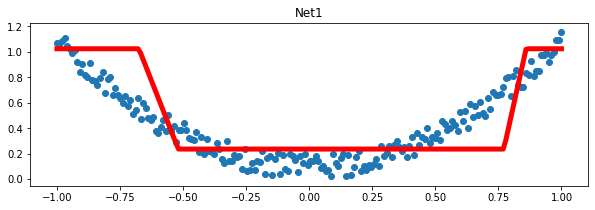

In [283]:
# save net1
save()


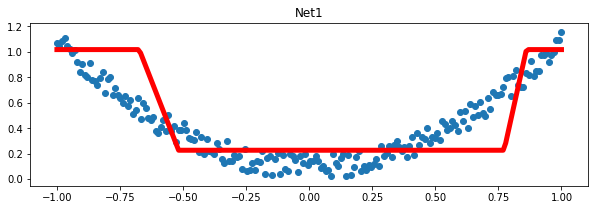

In [286]:
# restore entire net (may slow)
restore_net()

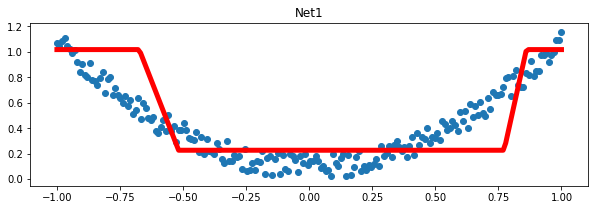

In [287]:
# restore only the net parameters
restore_params()